In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [43]:
df = pd.read_csv("../data/filtered_columns_with_overall.csv", sep = ",")

In [46]:
df.columns

Index(['Unnamed: 0', 'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4', 'KM5_1', 'KM5_2',
       'KM5_3', 'KM5_4', 'KM5_5', 'Overall'],
      dtype='object')

In [58]:
df

,Variable,K=4 Cluster 1,K=4 Cluster 2,K=4 Cluster 3,K=4 Cluster 4,K=5 Cluster 1,K=5 Cluster 2,K=5 Cluster 3,K=5 Cluster 4,K=5 Cluster 5,Overall
0,Seg_size,4080.00,1134.00,254.00,3481.00,1073.00,3248.00,780.00,30.00,3818.00,8949.00
1,Seg_Pct,0.46,0.13,0.03,0.39,0.12,0.36,0.09,0.00,0.43,1.00
2,Installment_Purchases,0.18,0.10,0.04,0.40,0.11,0.50,0.02,0.07,0.13,0.25
3,None_Of_the_Purchases,0.38,0.45,0.00,0.00,0.45,0.00,0.00,0.00,0.41,0.23
4,One_Of_Purchase,0.33,0.21,0.10,0.08,0.21,0.07,0.09,0.10,0.35,0.21
5,BALANCE,1106.62,4542.90,4046.21,950.19,4585.83,668.04,2646.31,5567.14,1225.91,1564.65
6,BALANCE_FREQUENCY,0.80,0.96,0.98,0.93,0.96,0.89,0.98,0.96,0.82,0.88
7,PURCHASES,268.21,541.63,9765.34,1375.98,510.23,920.74,4720.19,24957.91,264.57,1003.32
8,ONEOFF_PURCHASES,209.22,343.40,6673.72,679.16,318.28,358.28,3075.92,18186.88,223.22,592.50
9,INSTALLMENTS_PURCHASES,59.33,198.32,3091.62,697.16,192.05,562.80,1645.04,6771.03,41.58,411.11


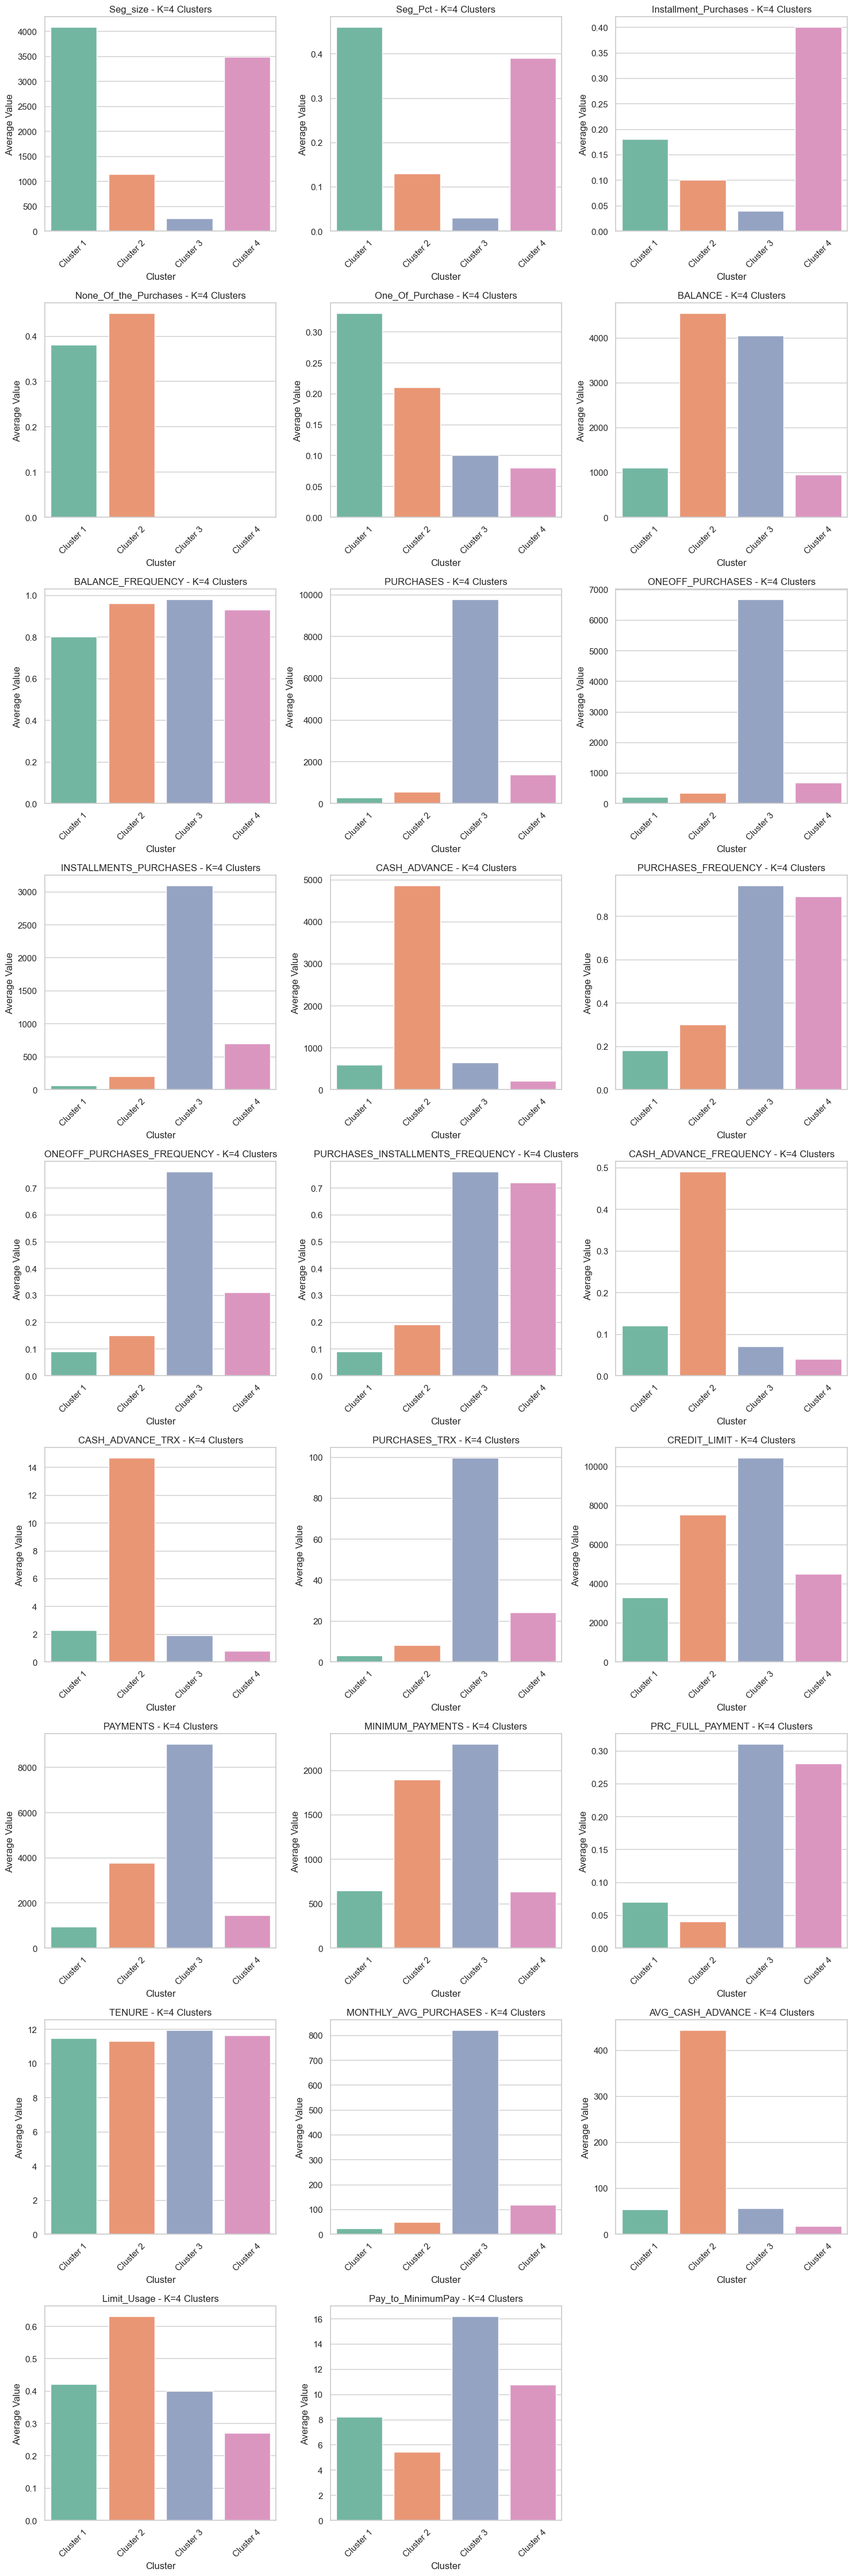

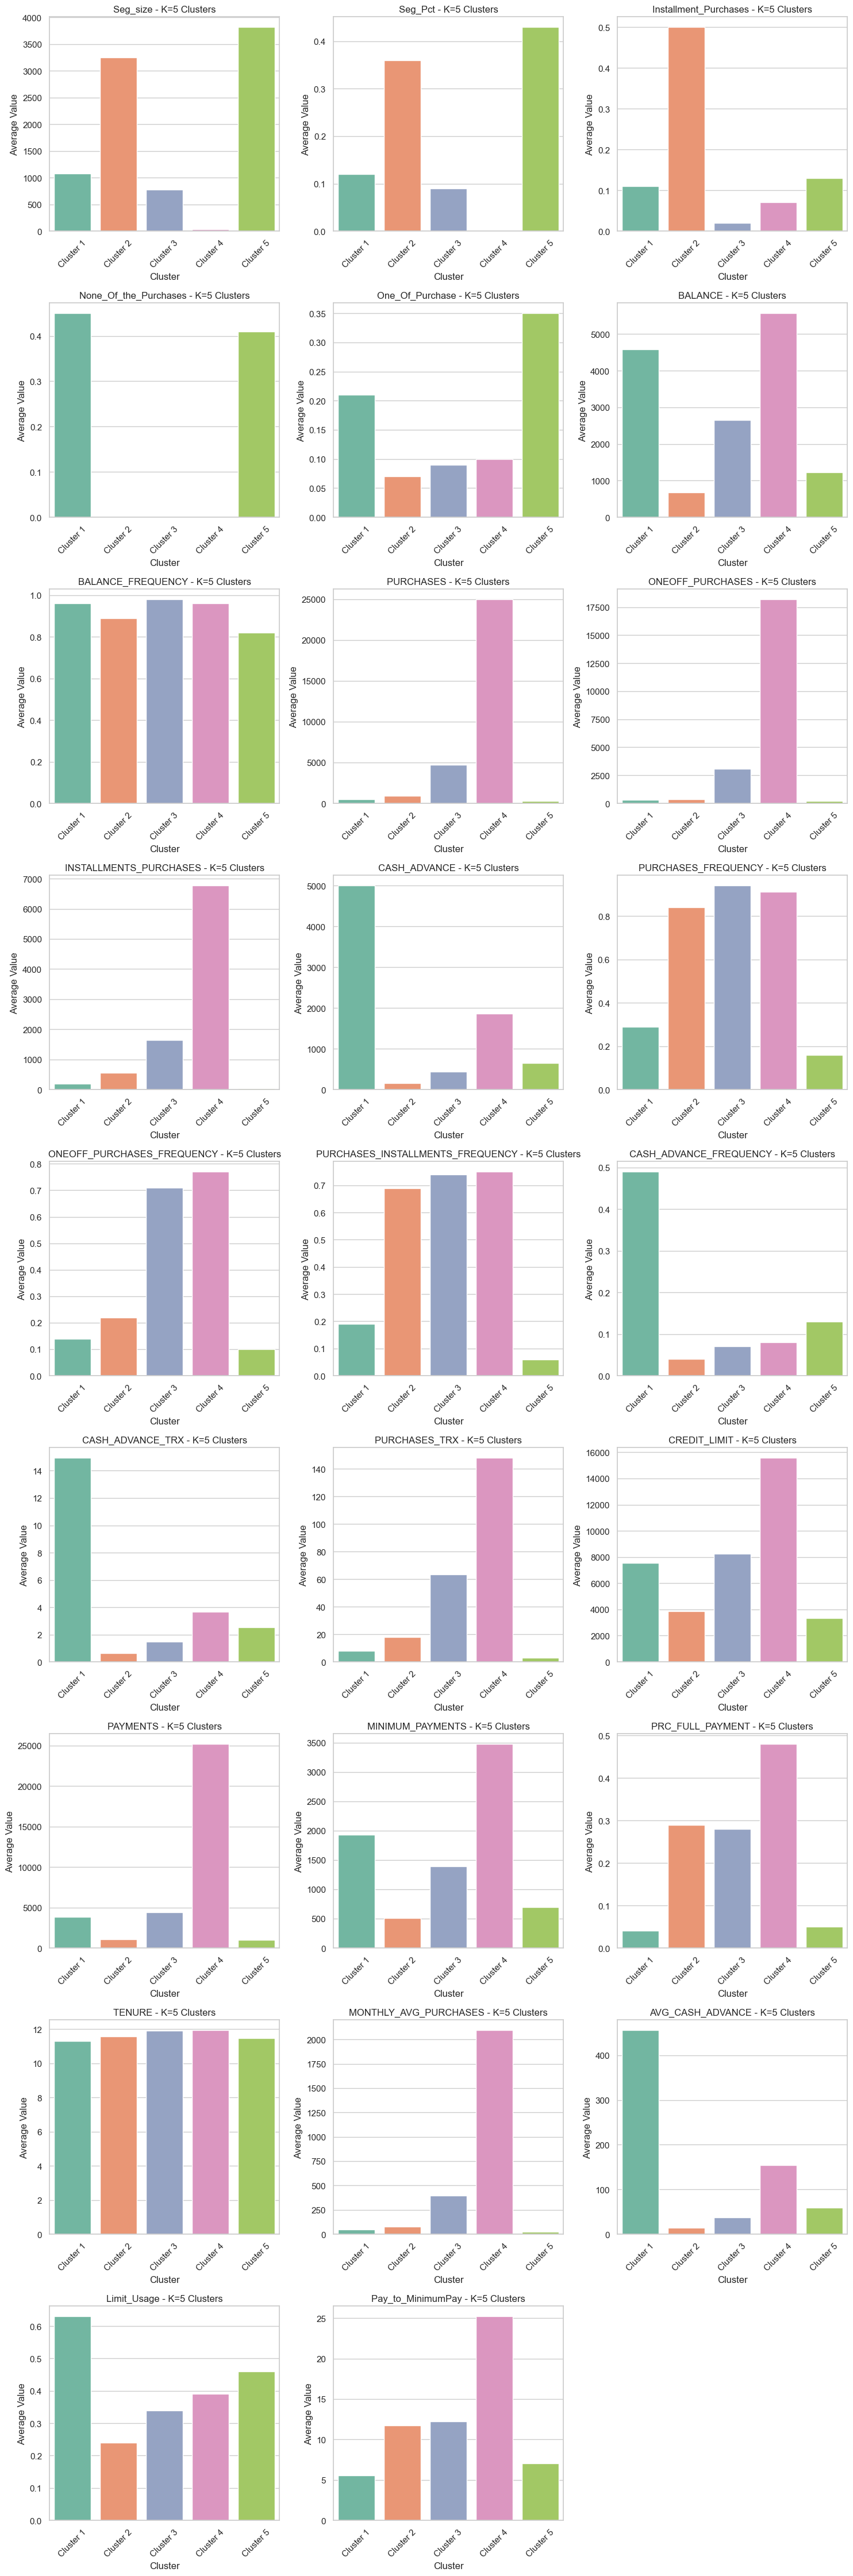

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded as your dataframe

# Rename columns for clarity
df.rename(columns={
    'Unnamed: 0': 'Variable',
    'KM4_1': 'K=4 Cluster 1',
    'KM4_2': 'K=4 Cluster 2',
    'KM4_3': 'K=4 Cluster 3',
    'KM4_4': 'K=4 Cluster 4',
    'KM5_1': 'K=5 Cluster 1',
    'KM5_2': 'K=5 Cluster 2',
    'KM5_3': 'K=5 Cluster 3',
    'KM5_4': 'K=5 Cluster 4',
    'KM5_5': 'K=5 Cluster 5',
    'Overall': 'Overall'
}, inplace=True)

# Separate the dataframe into K=4 and K=5
df_k4 = df[['Variable', 'K=4 Cluster 1', 'K=4 Cluster 2', 'K=4 Cluster 3', 'K=4 Cluster 4']]
df_k5 = df[['Variable', 'K=5 Cluster 1', 'K=5 Cluster 2', 'K=5 Cluster 3', 'K=5 Cluster 4', 'K=5 Cluster 5']]

# Transpose the K=4 dataframe
df_k4_transposed = df_k4.set_index('Variable').T
df_k5_transposed = df_k5.set_index('Variable').T

# Reshape the DataFrame to a long format for plotting
df_k4_long = df_k4_transposed.reset_index().melt(id_vars=["index"], value_vars=df_k4_transposed.columns)
df_k5_long = df_k5_transposed.reset_index().melt(id_vars=["index"], value_vars=df_k5_transposed.columns)

# Adjust column names for clarity
df_k4_long.columns = ['Cluster', 'Variable', 'Value']
df_k5_long.columns = ['Cluster', 'Variable', 'Value']

# Function to create bar plots
def plot_variable_barplots_grid(df_long, title_suffix):
    variables = df_long['Variable'].unique()
    n_vars = len(variables)
    n_cols = 3  # Number of columns for the grid
    n_rows = (n_vars // n_cols) + (n_vars % n_cols > 0)  # Calculate number of rows
    
    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Create a bar plot for each variable in the grid
    for idx, variable in enumerate(variables):
        ax = axes[idx]
        variable_data = df_long[df_long['Variable'] == variable]
        
        sns.barplot(data=variable_data, x='Cluster', y='Value', palette="Set2", ax=ax)
        ax.set_title(f'{variable} - K={title_suffix} Clusters')
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Average Value')
        ax.tick_params(axis='x', rotation=45)
        
        # Set custom labels for x-axis
        ax.set_xticks(range(len(variable_data['Cluster'].unique())))
        ax.set_xticklabels([f'Cluster {i+1}' for i in range(len(variable_data['Cluster'].unique()))])

    # Remove any unused subplots
    for idx in range(n_vars, len(axes)):
        fig.delaxes(axes[idx])
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Plot for K=4 clusters
plot_variable_barplots_grid(df_k4_long, 4)

# Plot for K=5 clusters
plot_variable_barplots_grid(df_k5_long, 5) 
